<a href="https://colab.research.google.com/github/berryaesi/CSEL-302-Introduction-to-Intelligent-System/blob/main/031924.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# **Part 1: Data Loading and Preprocessing**

In [ ]:
dataSet = pd.read_csv('onlinefoods.csv')

In [ ]:
dataSet['Output'] = dataSet['Output'].map({'Yes': 1, 'No': 0})
dataSet['Feedback'] = dataSet['Feedback'].map({'Positive': 1, 'Negative': 0})
dataSet['Monthly_Income'] = dataSet['Monthly Income'].map({'10001-25000': 1, 'More than 50000': 1, 'Below Rs. 10000': 0})

In [ ]:
ds_dummy = pd.get_dummies(dataSet, drop_first=True)

In [ ]:
ds_dummy['customFB'] = (ds_dummy['Feedback']>0).astype(int)

In [ ]:
X = ds_dummy.drop(['Age', 'Monthly_Income', 'Family size', 'Output', 'Feedback','customFB'],  axis = 1)
y = ds_dummy['customFB']

# **Part 2: Exploratory Data Analysis (EDA)**

 Descriptive Statistics:

In [ ]:
dataSet.describe()

,Age,Family size,latitude,longitude,Pin code,Output,Feedback,Monthly_Income
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,317.0,62.0
mean,24.628866,3.280928,12.972058,77.600160,560040.113402,0.775773,1.0,1.0
std,2.975593,1.351025,0.044489,0.051354,31.399609,0.417611,0.0,0.0
min,18.000000,1.000000,12.865200,77.484200,560001.000000,0.000000,1.0,1.0
25%,23.000000,2.000000,12.936900,77.565275,560010.750000,1.000000,1.0,1.0
50%,24.000000,3.000000,12.977000,77.592100,560033.500000,1.000000,1.0,1.0
75%,26.000000,4.000000,12.997025,77.630900,560068.000000,1.000000,1.0,1.0
max,33.000000,6.000000,13.102000,77.758200,560109.000000,1.000000,1.0,1.0


from matplotlib import pyplot as plt
_df_0['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Family size'].plot(kind='hist', bins=20, title='Family size')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['latitude'].plot(kind='hist', bins=20, title='latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['longitude'].plot(kind='hist', bins=20, title='longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Age', y='Family size', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Family size', y='latitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='latitude', y='longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='longitude', y='Pin code', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Family size'].plot(kind='line', figsize=(8, 4), title='Family size')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['latitude'].plot(kind='line', figsize=(8, 4), title='latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['longitude'].plot(kind='line', figsize=(8, 4), title='longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

 Visualizations:

<ipython-input-50-95f8a08d1e99>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age', y='customFB', data=ds_dummy, ci=None)


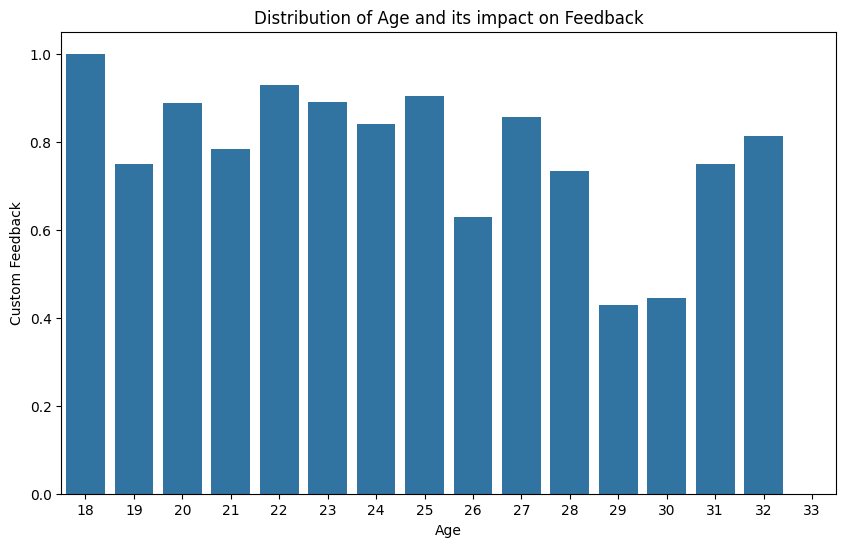

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='customFB', data=ds_dummy, ci=None)
plt.title('Distribution of Age and its impact on Feedback')
plt.xlabel('Age')
plt.ylabel('Custom Feedback')
plt.show()

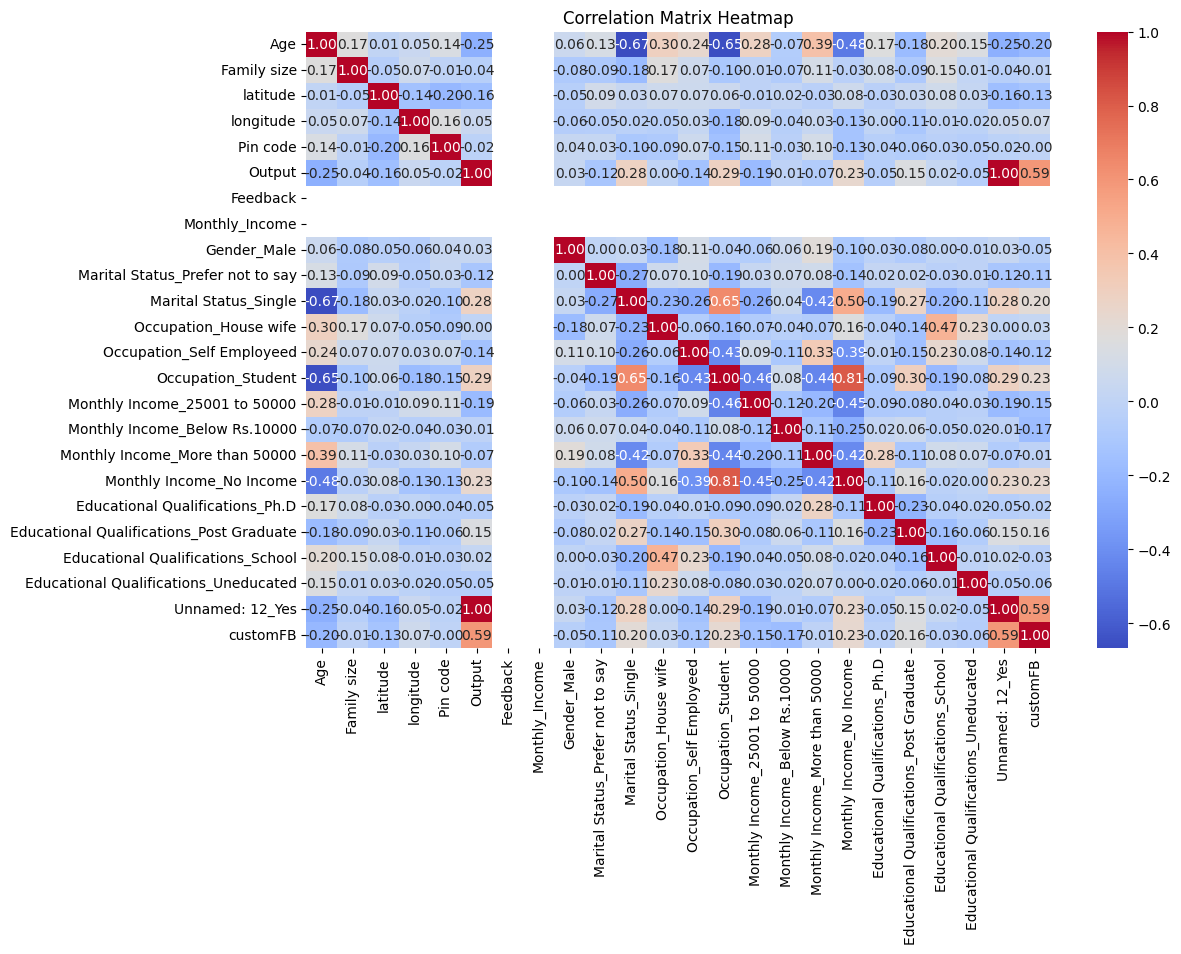

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(ds_dummy.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# **Part 3: Logistic Regression Model**

 Build the Model:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

 Model Evaluation:

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8589743589743589
Precision: 0.8589743589743589
Recall: 1.0
Confusion Matrix:
[[ 0 11]
 [ 0 67]]


# **Part 4: Data Analysis and Visualization**

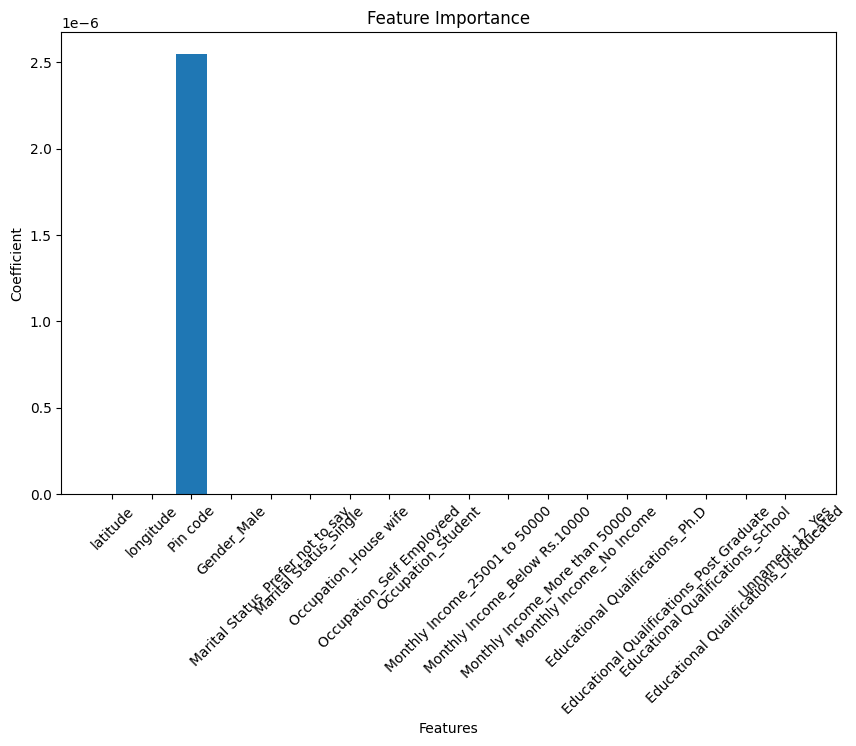

In [ ]:
# Get feature importance from the logistic regression model
feature_importance = model.coef_[0]
features = X.columns

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.bar(features, feature_importance)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()